In [1]:
import importlib
import gptree
importlib.reload(gptree)
from gptree import *
from funcs import *
import numpy as np
import random
"""import gp
importlib.reload(gp)
from gp import *"""
import pandas as pd

import gp_fijando_operaciones
importlib.reload(gp_fijando_operaciones)
from gp_fijando_operaciones import *


In [2]:

csvfile = pd.read_csv('unknown_function.csv')
x=csvfile['x'].values
print(x.shape)
y=csvfile['y'].values
print(y.shape)

(10900,)
(10900,)


In [3]:
funcdict = {
	'add' : 5,
	'sub' : 4,
	'mul' : 4,
	'div' : 4,
	'inv' : 3,
	'log' : 5,
	'sqrt' : 2,
	'exp' : 2,
	'max' : 2,
	'min' : 2,
	'floor' : 3
}


#gp = GP(M=500, max_depth=50, prob_node_symb=0.3, func_list=list(funcdict.keys()), depth_penalty=0.005)
#res = gp.execute(x,y, generations=100)
#res

gp_fijando_operaciones = GP(M=500, max_depth=50, prob_node_symb=0.5, func_list=list(funcdict.keys()), prob_func=list(funcdict.values()), elitism=0.05, depth_penalty=0.005)
res = gp_fijando_operaciones.execute(x,y, generations=50)
res

c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:39: RuntimeWarning: overflow encountered in exp
  return np.where(np.abs(x1) > INV_THRESHOLD, np.exp(np.abs(x1)), 0)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:35: RuntimeWarning: overflow encountered in divide
  return np.where(np.abs(x2) > INV_THRESHOLD, x1/x2, x1)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:20: RuntimeWarning: overflow encountered in multiply
  return self.operator(*args)
Progress:   0%|          | 0/50 [00:00<?, ?it/s]c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:20: RuntimeWarning: invalid value encountered in multiply
  return self.operator(*args)
Progress: 100%|██████████| 50/50 [01:23<00:00,  1.68s/it]


{'total_generations': 50,
 'best_fitness': array([9.91171839, 9.91171839, 8.5507051 , 8.5507051 , 3.63537813,
        3.63537813, 3.6111221 , 3.6111221 , 3.6111221 , 3.6111221 ,
        3.6111221 , 3.60957099, 3.60957099, 3.54052951, 3.54052951,
        3.54052951, 3.51926795, 3.45491195, 3.45491195, 3.37570528,
        3.37570528, 3.37563172, 3.28656384, 3.28656384, 3.17866172,
        3.16571997, 3.03880303, 3.00604249, 2.97776867, 2.97742901,
        2.97776867, 2.97936528, 2.97940428, 2.97940428, 2.97940255,
        2.9793924 , 2.97940255, 2.98207067, 2.9793924 , 2.97940255,
        2.97900265, 2.97940255, 2.97940255, 2.97940771, 2.97901451,
        2.97904123, 2.97901803, 2.98288457, 2.9826914 , 2.97898402,
        2.97897729]),
 'best_trees': array([Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), N

In [4]:
print('best fitness: \t' +  str(res['best_fitness'][-1]))
print('best fitness penalizado:\t' +  str(res['best_fitness_p'][-1]))

best fitness: 	2.978977291194825
best fitness penalizado:	3.2286553759175427


In [5]:
#res["best_trees"][-1].sympify_str()

In [6]:
(res["best_trees"][-1]).pprint()


  div_______________________
 /                          \
x                          _sub__________________________
                          /                              \
                ________inv                             _sub_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
               /                                       /                                                                                                                                                                                                                                                                             \
      1.121404722232705                             _exp                                                                                                                  

In [7]:
#arbol = "div(x,log(sub(mul(div(inv(log(inv(log(0.4981859242141673)))),mul(inv(log(0.4981859242141673)),log(log(inv(0.4981859242141673))))),log(x)),div(x,div(inv(log(inv(0.4981859242141673))),mul(inv(log(inv(0.4981859242141673))),log(0.7107532914770232)))))))"
#sympy.sympify(arbol,locals=SYMPY_FUNC_CONVERTER)
#arbol.sympify_str()

In [8]:
print(res['best_trees'][-1])

div(x,sub(inv(1.121404722232705),sub(exp(inv(1.48196694829418)),log(add(add(add(add(add(add(add(add(add(add(add(add(add(x,log(x)),log(x)),log(x)),log(x)),log(x)),log(x)),log(x)),log(x)),log(x)),log(x)),log(add(add(add(add(add(add(add(x,log(x)),x),log(x)),log(x)),log(x)),log(x)),log(x)))),log(x)),log(add(add(add(add(add(add(add(x,log(x)),log(x)),x),log(x)),log(x)),log(x)),log(x))))))))


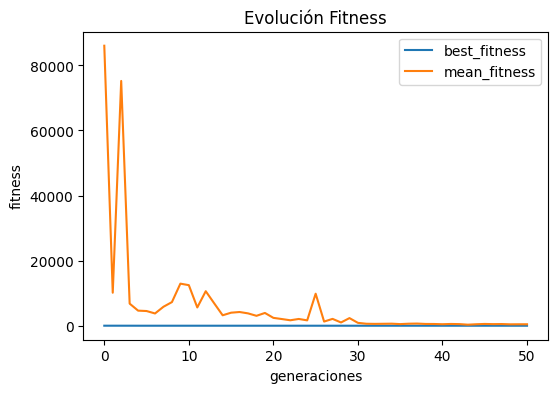

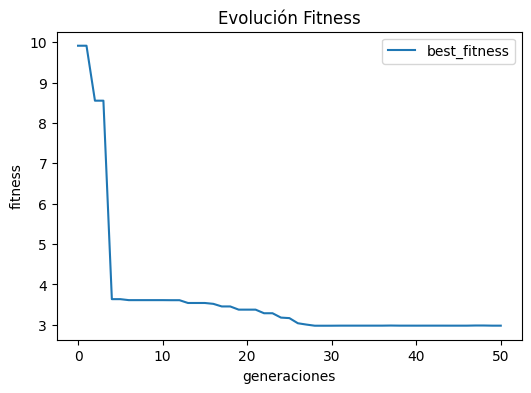

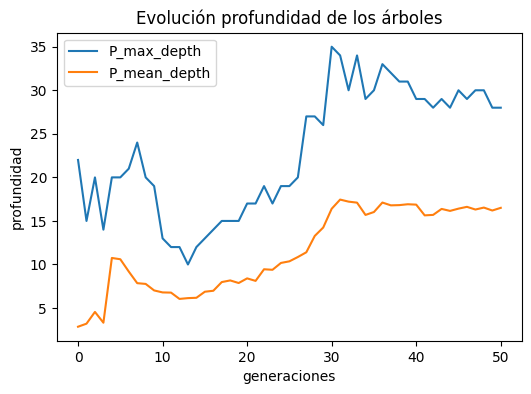

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.plot(res['mean_fitness'], label='mean_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['P_max_depth'], label='P_max_depth')
plt.plot(res['P_mean_depth'], label='P_mean_depth')
plt.title("Evolución profundidad de los árboles")
plt.ylabel('profundidad')
plt.xlabel('generaciones')
plt.legend()